# Import and define functions

In [1]:
# denoising autoencoder of Geron
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

C:\Users\junta\Anaconda2\envs\py3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# Denoising autoencoder with Gaussian noise (autoencoder6)

09% Train MSE: 0.04381171
1 Train MSE: 0.040369675
2 Train MSE: 0.039120957
39% Train MSE: 0.040504374
4 Train MSE: 0.038036216
5 Train MSE: 0.041129965
6 Train MSE: 0.040461022
79% Train MSE: 0.039998513
8 %Train MSE: 0.04093008
99% Train MSE: 0.038017053
INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_gaussian.ckpt


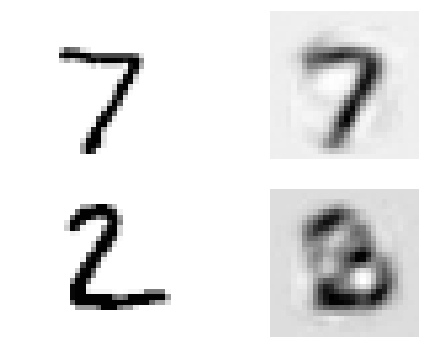

In [2]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01

noise_level = 1.0

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
X_noisy = X + noise_level * tf.random_normal(tf.shape(X))

hidden1 = tf.layers.dense(X_noisy, n_hidden1, activation=tf.nn.relu,
                          name="hidden1")
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, # not shown in the book
                          name="hidden2")                            # not shown
hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, # not shown
                          name="hidden3")                            # not shown
outputs = tf.layers.dense(hidden3, n_outputs, name="outputs")        # not shown

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()



n_epochs = 10
batch_size = 150


with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train)
        saver.save(sess, "./my_model_stacked_denoising_gaussian.ckpt")

        
show_reconstructed_digits(X, outputs, "./my_model_stacked_denoising_gaussian.ckpt")
plt.show()

# Denoising autoencoder with Dropout (autoencoder7)

0 Train MSE: 0.02984459
1 Train MSE: 0.029920489
2 Train MSE: 0.02879964
3 Train MSE: 0.027556239
4 Train MSE: 0.027905656
5 Train MSE: 0.026750725
6 Train MSE: 0.028814394
7 Train MSE: 0.026900787
8 Train MSE: 0.027195292
9 Train MSE: 0.027080338
INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_dropout.ckpt


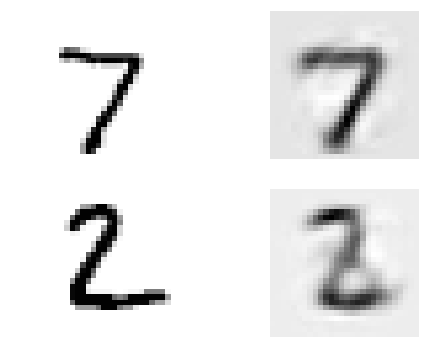

In [4]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01

dropout_rate = 0.3

training = tf.placeholder_with_default(False, shape=(), name='training')

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu,
                          name="hidden11")
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, # not shown in the book
                          name="hidden22")                            # not shown
hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, # not shown
                          name="hidden33")                            # not shown
outputs = tf.layers.dense(hidden3, n_outputs, name="outputs1")        # not shown

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 10
batch_size = 150


with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, training: True})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train)
        saver.save(sess,"./my_model_stacked_denoising_dropout.ckpt")

        
show_reconstructed_digits(X, outputs, "./my_model_stacked_denoising_dropout.ckpt")
plt.show()

# Sparse autoencoder (autoencoder8)

0 Train MSE: 0.13527289 	Sparsity loss: 1.0535133 	Total loss: 0.34597555
1 Train MSE: 0.05921044 	Sparsity loss: 0.10527147 	Total loss: 0.08026473
2 Train MSE: 0.05356519 	Sparsity loss: 0.03525776 	Total loss: 0.060616743
3 Train MSE: 0.04845543 	Sparsity loss: 0.019232906 	Total loss: 0.05230201
4 Train MSE: 0.045374602 	Sparsity loss: 0.014177574 	Total loss: 0.048210118
58% Train MSE: 0.042422086 	Sparsity loss: 0.039783794 	Total loss: 0.050378844
6 Train MSE: 0.03797371 	Sparsity loss: 0.14158446 	Total loss: 0.0662906
7 Train MSE: 0.036743917 	Sparsity loss: 0.019786919 	Total loss: 0.0407013
8 Train MSE: 0.03429697 	Sparsity loss: 0.03291618 	Total loss: 0.040880207
9 Train MSE: 0.030445447 	Sparsity loss: 0.023563245 	Total loss: 0.035158098
10 Train MSE: 0.0289872 	Sparsity loss: 0.25607455 	Total loss: 0.08020211
11 Train MSE: 0.025481254 	Sparsity loss: 0.09509839 	Total loss: 0.044500932
12 Train MSE: 0.023946317 	Sparsity loss: 0.47921857 	Total loss: 0.11979003
13 Trai

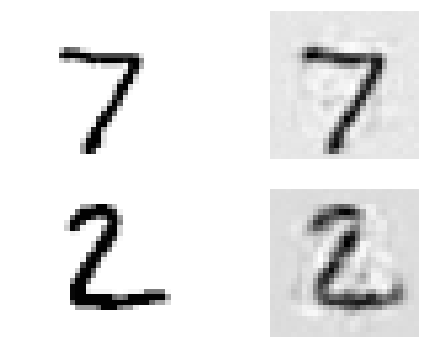

In [5]:
n_inputs = 28 * 28
n_hidden1 = 1000  # sparse codings
n_outputs = n_inputs

def kl_divergence(p, q):
    # Kullback Leibler divergence
    return p * tf.log(p / q) + (1 - p) * tf.log((1 - p) / (1 - q))

learning_rate = 0.01
sparsity_target = 0.1
sparsity_weight = 0.2

X = tf.placeholder(tf.float32, shape=[None, n_inputs])            # not shown in the book

hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.sigmoid) # not shown
outputs = tf.layers.dense(hidden1, n_outputs)                     # not shown

hidden1_mean = tf.reduce_mean(hidden1, axis=0) # batch mean
sparsity_loss = tf.reduce_sum(kl_divergence(sparsity_target, hidden1_mean))
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
loss = reconstruction_loss + sparsity_weight * sparsity_loss

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 100
batch_size = 1000

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        reconstruction_loss_val, sparsity_loss_val, loss_val = sess.run([reconstruction_loss, sparsity_loss, loss], feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", reconstruction_loss_val, "\tSparsity loss:", sparsity_loss_val, "\tTotal loss:", loss_val)
        saver.save(sess,"./my_model_sparse.ckpt")

        
show_reconstructed_digits(X, outputs, "./my_model_sparse.ckpt")
plt.show()

 # Variational autoencoder (autoencoder9)

0 Train total loss: 19030.82 	Reconstruction loss: 15248.404 	Latent loss: 3782.4155
1 Train total loss: 17291.09 	Reconstruction loss: 13497.684 	Latent loss: 3793.4072
2 Train total loss: 16714.605 	Reconstruction loss: 12935.844 	Latent loss: 3778.7617
3 Train total loss: 16229.996 	Reconstruction loss: 12452.455 	Latent loss: 3777.541
4 Train total loss: 16612.201 	Reconstruction loss: 12816.47 	Latent loss: 3795.7322
5 Train total loss: 16141.811 	Reconstruction loss: 12329.143 	Latent loss: 3812.6682
6 Train total loss: 15601.006 	Reconstruction loss: 11863.322 	Latent loss: 3737.684
7 Train total loss: 15617.277 	Reconstruction loss: 11910.791 	Latent loss: 3706.4858
8 Train total loss: 15714.168 	Reconstruction loss: 11979.887 	Latent loss: 3734.281
9 Train total loss: 15956.4 	Reconstruction loss: 12154.782 	Latent loss: 3801.6187
10 Train total loss: 15460.737 	Reconstruction loss: 11696.498 	Latent loss: 3764.2393
11 Train total loss: 15243.278 	Reconstruction loss: 11463.21

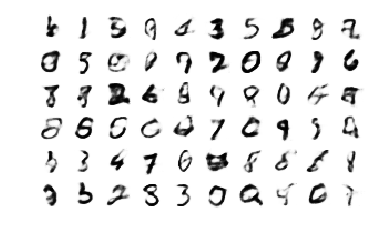

In [6]:
from functools import partial
import numpy as np

n_inputs = 28 * 28
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20  # codings
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()
my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_gamma = my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_gamma), dtype=tf.float32)
hidden3 = hidden3_mean + tf.exp(0.5 * hidden3_gamma) * noise
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
logits = my_dense_layer(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy)
latent_loss = 0.5 * tf.reduce_sum(
    tf.exp(hidden3_gamma) + tf.square(hidden3_mean) - 1 - hidden3_gamma)
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

def plot_multiple_images(images, n_rows, n_cols, pad=2):
    images = images - images.min()  # make the minimum == 0, so the padding looks white
    w,h = images.shape[1:]
    image = np.zeros(((w+pad)*n_rows+pad, (h+pad)*n_cols+pad))
    for y in range(n_rows):
        for x in range(n_cols):
            image[(y*(h+pad)+pad):(y*(h+pad)+pad+h),(x*(w+pad)+pad):(x*(w+pad)+pad+w)] = images[y*n_cols+x]
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.axis("off")

n_digits = 60
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="") # not shown in the book
            sys.stdout.flush()                                          # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss], feed_dict={X: X_batch}) # not shown
        print("\r{}".format(epoch), "Train total loss:", loss_val, "\tReconstruction loss:", reconstruction_loss_val, "\tLatent loss:", latent_loss_val)  # not shown
    
    codings_rnd = np.random.normal(size=[n_digits, n_hidden3])
    outputs_val = outputs.eval(feed_dict={hidden3: codings_rnd})

n_rows = 6
n_cols = 10
plot_multiple_images(outputs_val.reshape(-1, 28, 28), n_rows, n_cols)
plt.show()